<a href="https://colab.research.google.com/github/Madhavgiga1/SoftwareCostPrediction-Using-Machine-Learning/blob/main/Cocomo_81_Random_svm_DTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install liac-arff

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=18929ff4cce953ee2c0d21f7ec020f1c523a5b562267cdc9b1b6056286d9fe5f
  Stored in directory: c:\users\sharm\appdata\local\pip\cache\wheels\08\82\8b\5c514221984e88c059b94e36a71d4722e590acaae04deab22e
Successfully built liac-arff
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import arff, numpy as np
import pandas as pd
from scipy.io.arff import loadarff
import urllib.request
from io import StringIO, BytesIO
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
cocomo81_url = 'http://promise.site.uottawa.ca/SERepository/datasets/cocomo81.arff'
resp81 = urllib.request.urlopen(cocomo81_url)
cocomo81_data, cocomo81_meta = loadarff(StringIO(resp81.read().decode('utf-8')))
cocomo81_df = pd.DataFrame(cocomo81_data)

# Convert dataframe to numpy array
data = cocomo81_df.values

In [ ]:
data.shape

(63, 17)

In [ ]:
X=data[:,0:16]
Y=data[:,16:17]

In [ ]:
Y=Y.reshape(63)


In [ ]:
X.shape


(63, 16)

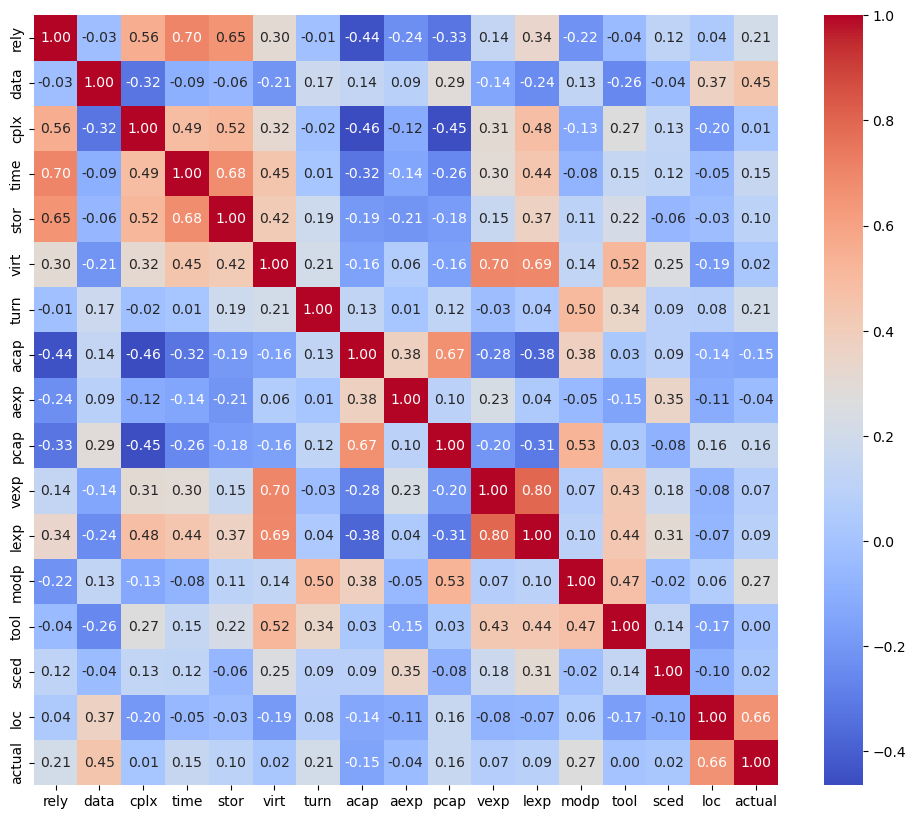

In [ ]:
import seaborn as sns
corr_matrix = cocomo81_df.corr()
plt.figure(figsize=(12,10))

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()

# Random Forest

#  Cocomo n_estimator=100 and max_features= 1 to 16

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [ ]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

In [ ]:
n_feature=7
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(1,11):   
    clf= RandomForestRegressor(n_estimators=100,max_features=i)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [ ]:
MMRE_list

[0.7731930428616443,
 0.771539941429576,
 0.7663668979134058,
 0.768177037974523,
 0.765417291394854,
 0.7635440598828873,
 0.7729606233683305,
 0.7734453294316261,
 0.7658399520308042,
 0.7698876175520479]

In [ ]:
MdMRE_list


[0.7731707317073171,
 0.7829268292682927,
 0.7719512195121951,
 0.7957317073170732,
 0.8107317073170732,
 0.805609756097561,
 0.807560975609756,
 0.8253658536585367,
 0.8250000000000001,
 0.8221951219512196]

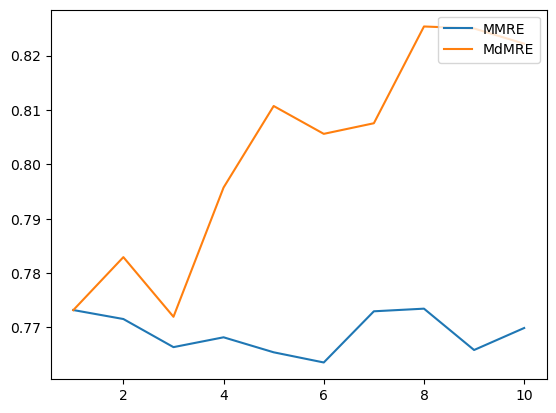

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,11)

plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

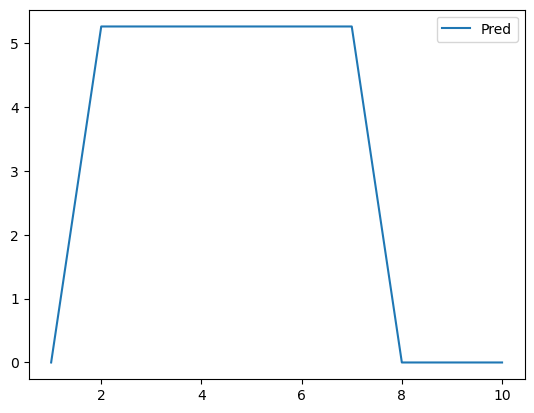

In [ ]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

## COCOMO n_estimator=100 to 2000 and max_features= 7


In [ ]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(100,1100,100):   
    clf= RandomForestRegressor(n_estimators=i,max_features=7)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [ ]:
MMRE_list


[0.7615560756920279,
 0.7733128789392182,
 0.7615474508732825,
 0.7711129756058243,
 0.7693364578410214,
 0.7719510848596008,
 0.766207663937104,
 0.7670218919308973,
 0.7694286189474312,
 0.7705400834998141]

In [ ]:
MdMRE_list


[0.8179230769230769,
 0.8171951219512196,
 0.8136666666666666,
 0.8103963414634147,
 0.808170731707317,
 0.8199390243902439,
 0.8178397212543553,
 0.8080487804878049,
 0.8133062330623306,
 0.8141341463414634]

In [ ]:
Pred_list


[5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 0.0,
 5.263157894736842,
 0.0,
 0.0,
 0.0,
 5.263157894736842,
 0.0]

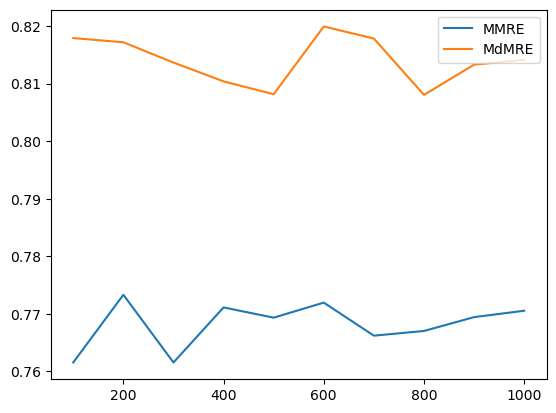

In [ ]:
x = np.arange(100,1100,100)
plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

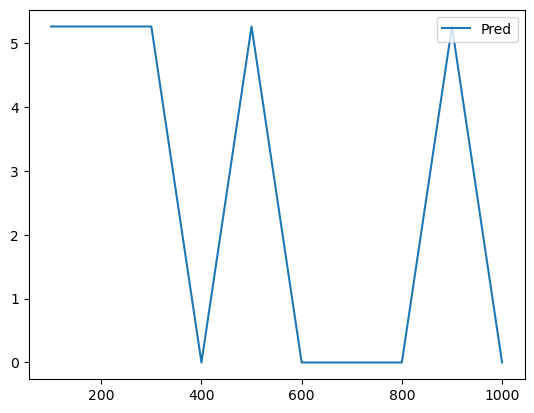

In [ ]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# GRIDSEARCH CV

In [ ]:
params_grd={
 'max_features': [1,2,3,4,5,6,7,8,9,10],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
clf= RandomForestRegressor()
grd_search=GridSearchCV(estimator = clf, param_grid = params_grd, 
                          cv = 10, n_jobs = -1, verbose = 2)
grd_search.fit(X_train, training_scores_encoded)
best_grid = grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
print(MMRE)
print(MdMRE)
print(Pred)

0.7643307303049793
0.8158589743589744
5.263157894736842


In [ ]:
grd_search.best_params_


{'max_features': 10, 'n_estimators': 1200}

# SVR

In [ ]:
svr_params = {'kernel': ('linear','rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

In [ ]:
from sklearn import svm
svr= svm.SVR()
svr_random_grd_search=RandomizedSearchCV(estimator = svr, param_distributions = svr_params, n_iter=48, cv = 10, random_state=42, n_jobs = -1)
svr_random_grd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVR(), n_iter=48, n_jobs=-1,
                   param_distributions={'C': [1.5, 10],
                                        'epsilon': [0.1, 0.2, 0.5, 0.3],
                                        'gamma': [1e-07, 0.0001],
                                        'kernel': ('linear', 'rbf', 'poly')},
                   random_state=42)

In [ ]:
def evaluate_model(actual, predicted):
    diff=np.absolute(actual-predicted)
    MRE=diff/actual
    pred = {}
    for x in np.array([.25, .3, .5]):
        P=MRE[MRE<x]
        pred[x] = (P.size/MRE.size) * 100
    return np.mean(MRE), np.median(MRE), pred

In [ ]:
print(svr_random_grd_search.best_params_)
svr_y_predict = svr_random_grd_search.best_estimator_.predict(X_test)
print(evaluate_model(y_test, svr_y_predict))
print(svr_random_grd_search.best_score_)

{'kernel': 'linear', 'gamma': 1e-07, 'epsilon': 0.5, 'C': 10}
(1.206084001859198, 0.6855962159178751, {0.25: 15.789473684210526, 0.3: 21.052631578947366, 0.5: 42.10526315789473})
0.3251592530445405


In [ ]:
print('MMRE=1.206084001859198')
print('MdMRE=0.6855962159178751')

MMRE=1.206084001859198
MdMRE=0.6855962159178751


# Decision Tree

In [ ]:
clf= DecisionTreeRegressor(max_depth=30, min_samples_split=20)
clf.fit(X_train, training_scores_encoded)
Y_pred=clf.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


In [ ]:
print(MMRE)
print(MdMRE)
print(Pred)

0.7569677376178159
0.8394062078272605
5.263157894736842


# Multiple Linear Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mmre = np.mean((y_pred - y_test) / y_test)
mdmre = np.median(np.abs((y_pred - y_test) / y_test))

print("MMRE:", mmre)
print("MdMRE:", mdmre)



MMRE: actual   -5.844576
actual   -5.844576
dtype: float64
MdMRE: 7.349373538338501


C:\Users\sharm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


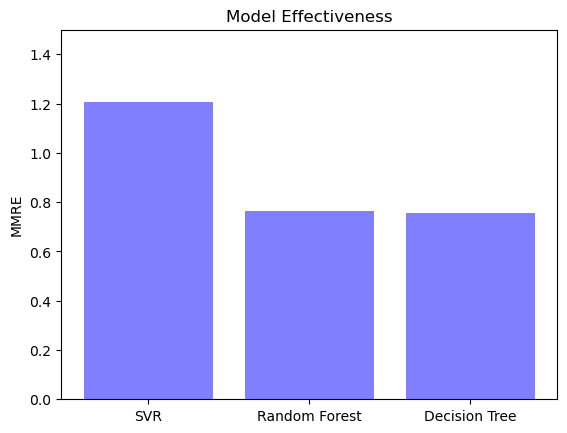

In [ ]:
mmre_values = [1.206084001859198,0.7643307303049793,0.7569677376178159]
mdmre_values = [0.6855962159178751,0.8158589743589744, 0.8394062078272605]
pred_values=[ 15.789473684210526,5.263157894736842,5.263157894736842]

# Labels for the x-axis (i.e. model names)
model_names = ['SVR', 'Random Forest', 'Decision Tree']

# Plot the MMRE values
plt.bar(model_names, mmre_values, color='b', alpha=0.5, align='center')
plt.ylabel('MMRE')
plt.ylim(0, 1.5) # Set the y-axis limit to 0-0.2
plt.title('Model Effectiveness')



plt.show()

Text(0.5, 1.0, 'Model Effectiveness')

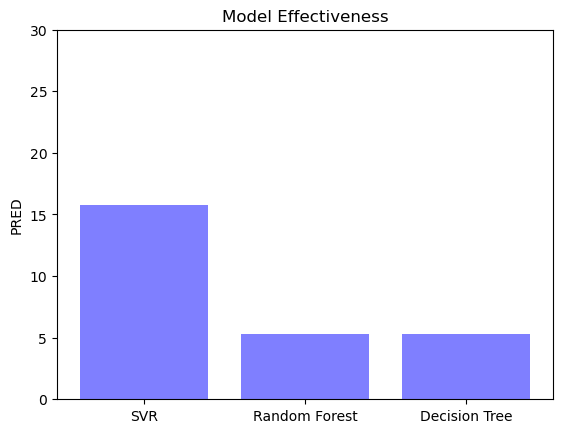

In [ ]:
plt.bar(model_names, pred_values, color='b', alpha=0.5, align='center')
plt.ylabel('PRED')
plt.ylim(0, 30) # Set the y-axis limit to 0-0.2
plt.title('Model Effectiveness')